# HW1 
This home  work consists of 3 parts:
1. In the first part we should train a neural network using correlation learning rule for 3 alphabets (A ,B ,C).
2. In this part we should first use pseudo inverse method to directly solve a regression problem and then compare it with result came from the RASNAC method.
3. Lastly we should solve a classification problem using perceptron method.  

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Associative learning with correlation learning rule
In this part we had to model the alphabets (A, B, C) using a 2d array(10*5).the modeled alphabets are shown below.

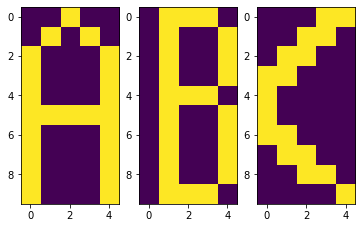

In [2]:
A = np.array([[0,0,1,0,0],[0,1,0,1,0],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,1,1,1,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1]])
A_normed = A/np.linalg.norm(A)
B = np.array([[0,1,1,1,0],[0,1,0,0,1],[0,1,0,0,1],[0,1,0,0,1],[0,1,1,1,0],[0,1,0,0,1],[0,1,0,0,1],[0,1,0,0,1],[0,1,0,0,1],[0,1,1,1,0]])
B_normed = B/np.linalg.norm(B)
C = np.array([[0,0,0,1,1],[0,0,1,1,0],[0,1,1,0,0],[1,1,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,1,0,0,0],[0,1,1,0,0],[0,0,1,1,0],[0,0,0,0,1]])
C_normed = C/np.linalg.norm(C)
fig , axes = plt.subplots(1,3)
axes[0].imshow(A_normed)
axes[1].imshow(B_normed)
axes[2].imshow(C_normed)
plt.show()

## 1.1.1 Pre_proccess
1. For the best result the inputs should be Orthonormal but this was not achievable becuase the inputs were not ortogonal.
2. So As we were instructed we needed the input's norm to be 1 and the the inputs have to be in (#features,#inputs) shpae.
3. In this model the output is in fact the input.

In [3]:
T = np.array([A_normed.reshape(-1,1).T[0],B_normed.reshape(-1,1).T[0],C_normed.reshape(-1,1).T[0]]).T
X = T
X.shape

(50, 3)

## 1.1.2 Training the model
The weights are achieved by the equation below:
$$
W =  TX^T
$$ 

In [4]:
W = T @ X.T
W.shape

(50, 50)

## 1.1.3 Testing the model
As you can see the outputs are distinguishable.

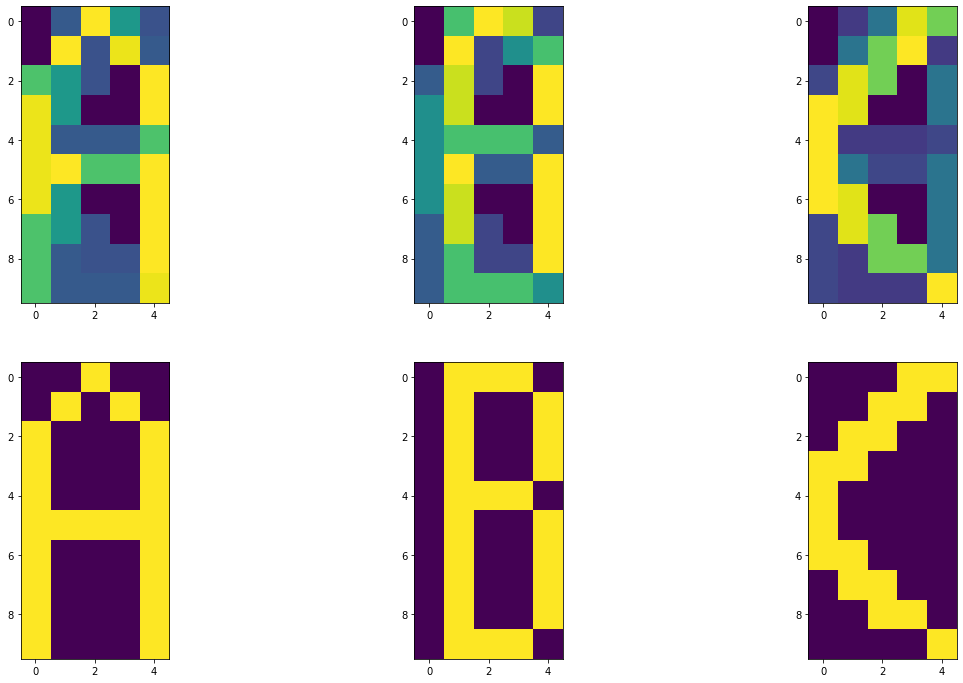

In [5]:
fig , axes = plt.subplots(2,3,figsize=(20,12))
out_A = np.dot(W,A_normed.reshape(-1,1).T[0])
out_B = np.dot(W,B_normed.reshape(-1,1).T[0])
out_C =  np.dot(W,C_normed.reshape(-1,1).T[0])
axes[0,0].imshow(out_A.reshape(10,5))
axes[0,1].imshow(out_B.reshape(10,5))
axes[0,2].imshow(out_C.reshape(10,5))
axes[1,0].imshow(A_normed)
axes[1,1].imshow(B_normed)
axes[1,2].imshow(C_normed)
plt.show()

## 1.1.4 mse cost

In [6]:
predict = np.array([out_A,out_B,out_C]).T
mse_cost = 1/X.shape[1] * np.sum(np.power((X - predict),2))
mse_cost

0.27629233511586443

## weights achieved

In [7]:
print(W)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.        ]
 [0.         0.04347826 0.08893281 ... 0.04347826 0.04347826 0.04545455]
 ...
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.        ]
 [0.         0.04347826 0.04347826 ... 0.04347826 0.04347826 0.        ]
 [0.         0.         0.04545455 ... 0.         0.         0.10427807]]


## Flip
This function gets the input array and a percentage and returns an array which it's elements are randomly flliped. 

In [8]:
def flip(arr,percent = 0.3):
    choices = np.random.choice(50,int(50*percent),replace=False)
    for i in choices:
        row = i // 5
        column = i % 5
        if arr[row,column] == 1:
            arr[row,column]=0
        else:
            arr[row,column]=1
    return arr

## 1.2.1 10% noise
In this the inputs are noisy with a percentage and the noisy inputs are given to the model.
As you can see 10 % noise does not effect the output.

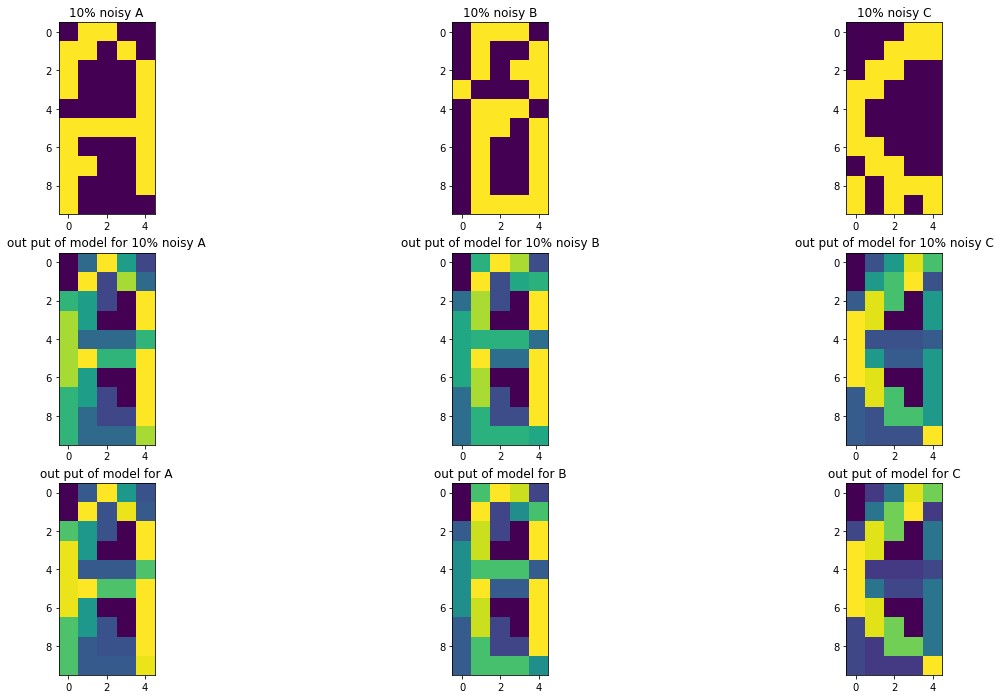

In [9]:
noisy_A=flip(np.copy(A),0.1)
noisy_B=flip(np.copy(B),0.1)
noisy_C=flip(np.copy(C),0.1)
out_A_noise = np.dot(W,(noisy_A/np.linalg.norm(noisy_A)).reshape(-1,1).T[0])
out_B_noise = np.dot(W,(noisy_B/np.linalg.norm(noisy_B)).reshape(-1,1).T[0])
out_C_noise =  np.dot(W,(noisy_C/np.linalg.norm(noisy_C)).reshape(-1,1).T[0])
fig , axes = plt.subplots(3,3,figsize=(20,12))
axes[0,0].imshow(noisy_A.reshape(10,5))
axes[0,0].set_title('10% noisy A')
axes[0,1].imshow(noisy_B.reshape(10,5))
axes[0,1].set_title('10% noisy B')
axes[0,2].imshow(noisy_C.reshape(10,5))
axes[0,2].set_title('10% noisy C')
axes[1,0].imshow(out_A_noise.reshape(10,5))
axes[1,0].set_title('out put of model for 10% noisy A')
axes[1,1].imshow(out_B_noise.reshape(10,5))
axes[1,1].set_title('out put of model for 10% noisy B')
axes[1,2].imshow(out_C_noise.reshape(10,5))
axes[1,2].set_title('out put of model for 10% noisy C')
axes[2,0].imshow(out_A.reshape(10,5))
axes[2,0].set_title('out put of model for A')
axes[2,1].imshow(out_B.reshape(10,5))
axes[2,1].set_title('out put of model for B')
axes[2,2].imshow(out_C.reshape(10,5))
axes[2,2].set_title('out put of model for C')

plt.show()

## 1.2.2 20% noise
In this the inputs are noisy with a percentage and the noisy inputs are given to the model.
As you can see 20 % noise does not effect the output

In [10]:
noisy_A=flip(np.copy(A),0.2)
noisy_B=flip(np.copy(B),0.2)
noisy_C=flip(np.copy(C),0.2)
out_A_noise = np.dot(W,(noisy_A/np.linalg.norm(noisy_A)).reshape(-1,1).T[0])
out_B_noise = np.dot(W,(noisy_B/np.linalg.norm(noisy_B)).reshape(-1,1).T[0])
out_C_noise =  np.dot(W,(noisy_C/np.linalg.norm(noisy_C)).reshape(-1,1).T[0])
axes[0,0].imshow(noisy_A.reshape(10,5))
axes[0,0].set_title('20% noisy A')
axes[0,1].imshow(noisy_B.reshape(10,5))
axes[0,1].set_title('20% noisy B')
axes[0,2].imshow(noisy_C.reshape(10,5))
axes[0,2].set_title('20% noisy C')
axes[1,0].imshow(out_A_noise.reshape(10,5))
axes[1,0].set_title('out put of model for 20% noisy A')
axes[1,1].imshow(out_B_noise.reshape(10,5))
axes[1,1].set_title('out put of model for 20% noisy B')
axes[1,2].imshow(out_C_noise.reshape(10,5))
axes[1,2].set_title('out put of model for 20% noisy C')
axes[2,0].imshow(out_A.reshape(10,5))
axes[2,0].set_title('out put of model for A')
axes[2,1].imshow(out_B.reshape(10,5))
axes[2,1].set_title('out put of model for B')
axes[2,2].imshow(out_C.reshape(10,5))
axes[2,2].set_title('out put of model for C')
plt.show()

## 1.2.3 30% noise
In this the inputs are noisy with a percentage and the noisy inputs are given to the model.
As you can see 30 % noise does not effect the output

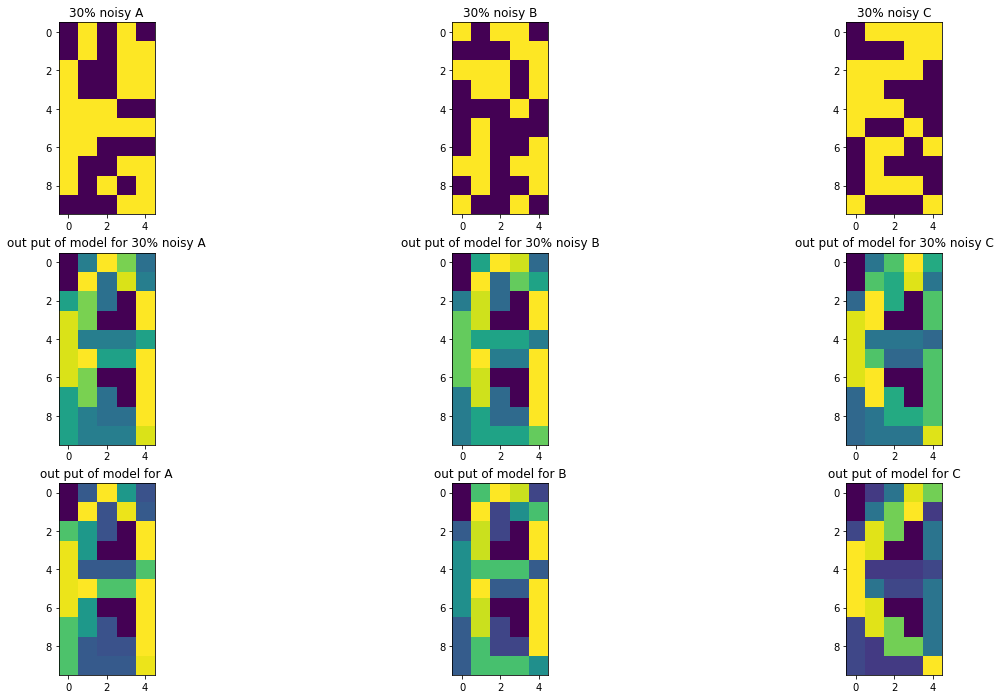

In [11]:
noisy_A=flip(np.copy(A),0.3)
noisy_B=flip(np.copy(B),0.3)
noisy_C=flip(np.copy(C),0.3)
out_A_noise = np.dot(W,(noisy_A/np.linalg.norm(noisy_A)).reshape(-1,1).T[0])
out_B_noise = np.dot(W,(noisy_B/np.linalg.norm(noisy_B)).reshape(-1,1).T[0])
out_C_noise =  np.dot(W,(noisy_C/np.linalg.norm(noisy_C)).reshape(-1,1).T[0])
fig , axes = plt.subplots(3,3,figsize=(20,12))
axes[0,0].imshow(noisy_A.reshape(10,5))
axes[0,0].set_title('30% noisy A')
axes[0,1].imshow(noisy_B.reshape(10,5))
axes[0,1].set_title('30% noisy B')
axes[0,2].imshow(noisy_C.reshape(10,5))
axes[0,2].set_title('30% noisy C')
axes[1,0].imshow(out_A_noise.reshape(10,5))
axes[1,0].set_title('out put of model for 30% noisy A')
axes[1,1].imshow(out_B_noise.reshape(10,5))
axes[1,1].set_title('out put of model for 30% noisy B')
axes[1,2].imshow(out_C_noise.reshape(10,5))
axes[1,2].set_title('out put of model for 30% noisy C')
axes[2,0].imshow(out_A.reshape(10,5))
axes[2,0].set_title('out put of model for A')
axes[2,1].imshow(out_B.reshape(10,5))
axes[2,1].set_title('out put of model for B')
axes[2,2].imshow(out_C.reshape(10,5))
axes[2,2].set_title('out put of model for C')
plt.show()

## 1.2.4 Result
As you can see our model is bulletproof againts 30% noise.

## 2. psuedo inverse

In [12]:
samples_theta = {0.5197:0,0.4404 :5,
0.4850 :10,
0.4222 :15,
0.4132 :20,
0.4371 :25,
0.3912 :30,
0.3949 :35,
1.3910 :40,
0.4276 :45,
0.4075 :50,
0.3956 :55,
2.4053 :60,
0.4752 :65,
0.5032 :70,
0.5273 :75,
0.4879 :80}

## 2.1.1 pre_procces
1. The data is given in polar coordinates so fistly we should convert in ro decart coordinates.
2. Then we should split x and y to train the  NN.

In [13]:
sample_xy=[]
for key  in samples_theta:
    sample_xy.append([key*np.cos(samples_theta[key]),key*np.sin(samples_theta[key])])
sample_xy

[[0.5197, 0.0],
 [0.12492482647800485, -0.42231025056164617],
 [-0.40694969160207944, -0.26385023878134434],
 [-0.3207402368089944, 0.27455152611433475],
 [0.16861950794129357, 0.37722897760065577],
 [0.4332547490655243, -0.05785094996773659],
 [0.060343167196022875, -0.38651797134512755],
 [-0.35686805179063597, -0.16908933618403002],
 [-0.9277108437582963, 1.0364524062267741],
 [0.22462768241846123, 0.363846347090789],
 [0.39322365661053615, -0.10691775288435097],
 [0.00875334477722969, -0.39550314658067004],
 [-2.2908389417925754, -0.7331609869371618],
 [-0.26727807010837934, 0.39290898849369715],
 [0.31868622299302607, 0.3894217909599298],
 [0.4860394445258603, -0.20447725635139266],
 [-0.05385793626907131, -0.4849182742492148]]

In [14]:
x = np.array(sample_xy).T[0].reshape(-1,1)
y = np.array(sample_xy).T[1].reshape(-1,1)
x.shape

(17, 1)

## 2.1.2 Scatter plot

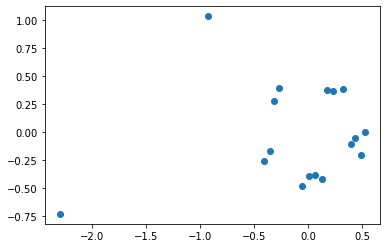

In [15]:
plt.scatter(x,y)
plt.show()

## 2.1.3 pseudo inverse method
We used pseudo inverse method to find the optimum weights.
$$
w = (x^Tx)^{-1}x^Ty
$$

In [16]:
w = np.linalg.inv(x.T @ x) @ x.T @ y
w.shape

(1, 1)

## 2.1.4 mse cost for pseudo inverse method
this cost is the minimum cost achievable by linear models.

In [17]:
predict_1 = (x@w)
mse_cost = 1/x.shape[0] * np.sum(np.power((y - predict_1.T),2))
mse_cost

3.205754256665923

## 2.1.5 plot result of pseudo inverse method

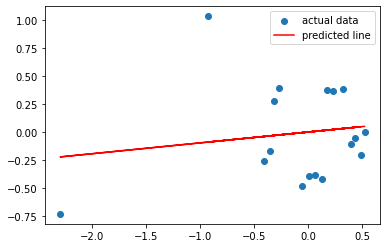

In [18]:
plt.scatter(x,y,label='actual data')
plt.plot(x,predict_1,label='predicted line',color='r')
plt.legend()
plt.show()

## 2.2.1 RANSAC method
This method is used when the input has outliers.This in an iterative method, in each iteration a random sample is chosen from the input and the model is trained on this sampled data.Then the model is validated on the remaining data if the value predicetd by model is less than a delta(hyperparameter) it is added to the inliers.Then if the number of inliers is more than a hyperparameter named also_inliers then the model is updated using inliers and the sampled data.After the update if the error of the updated model is better than the preveous iterations the best model is updated.

In [19]:
iterations = 100
k = 0
best_w = np.random.rand(1,1)
delta = 0.23
inliers = 0
also_inliers = 2 
best_cost = 10000
while k < iterations:
    i = np.random.choice(17,4,replace=False)
    inlier_x = x[i]
    inlier_y = y[i]
    w = np.linalg.inv(inlier_x.T @ inlier_x) @ inlier_x.T @ inlier_y
    j = np.setdiff1d(np.arange(17),i)
    others_x = x[j]
    others_y = y[j]
    predict = (others_x@w)
    diff = np.absolute(predict-others_y)
    inliers = np.sum(diff<=delta)
    if inliers >= also_inliers:
        inliers_x = np.concatenate((others_x[diff<=delta].reshape(-1,1),inlier_x))
        inliers_y = np.concatenate((others_y[diff<=delta].reshape(-1,1),inlier_y))
        w = np.linalg.inv(inliers_x.T @ inliers_x) @ inliers_x.T @ inliers_y
        predict_2 =  x@w
        mse_cost = 1/x.shape[0] * np.sum(np.power((y - predict_2.T),2))
        if mse_cost < best_cost:
            best_model_inliers_x = inliers_x
            best_model_inliers_y = inliers_y
            best_w = w
            outliers_x = others_x[diff>delta]
            outliers_y = others_y[diff>delta]    
    k = k+1

In [20]:
best_w

array([[0.28534159]])

## 2.2.2 RANSAC method mse cost
The best msecost is not better than pseudo inverse. 

In [21]:
predict_2 = x@best_w
mse_cost = 1/x.shape[0] * np.sum(np.power((y - predict_2.T),2))
mse_cost

3.73825826550616

## 2.2.3 RANSAC method result
I think a linear model is not a good fit for our dataset.So using RANSAC is not a good way to find outliers and fit the model to inliers because a large subset of the dataset is considered outliers.  

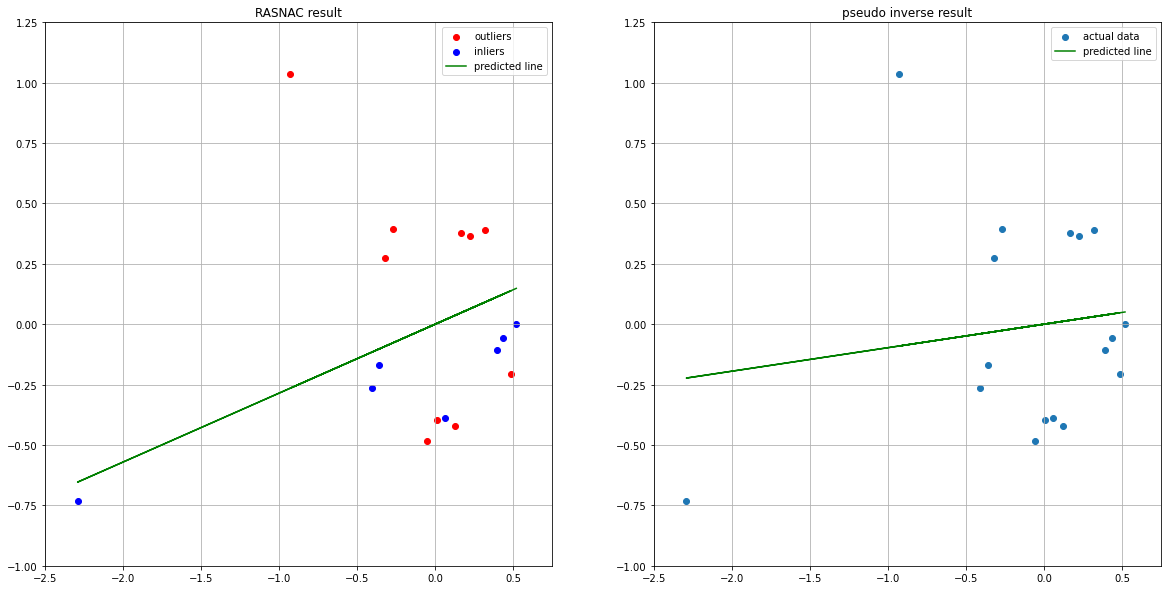

In [22]:
fig,axes =plt.subplots(1,2,figsize=(20,10))
axes[0].scatter(outliers_x,outliers_y,label='outliers',color='r')
axes[0].scatter(best_model_inliers_x,best_model_inliers_y,label='inliers',color='b')
axes[0].plot(x,predict_2,label='predicted line',color='g')
axes[0].set_title('RASNAC result')
axes[0].legend()
axes[0].set_ylim([-1, 1.25])
axes[0].set_xlim([-2.5, 0.75])
axes[0].grid()
axes[1].scatter(x,y,label='actual data')
axes[1].plot(x,predict_1,label='predicted line',color='g')
axes[1].set_title('pseudo inverse result')
axes[1].legend()
axes[1].set_ylim([-1, 1.25])
axes[1].set_xlim([-2.5, 0.75])
axes[1].grid()
plt.show()

## 3. Classification using perceptron

## 3.1 Proof of convergance of perceptron learning rule 

$$
update\_rule :w_{new} = w_{old} + ex
$$

$$
e\ is\ either: \{-1 , 0 ,1\}
$$

$$
w_k = w_{k-1}+z_{k-1}
$$
$$
z_k = \{x_1,x_2,..x_m,-x_1,-x_2,...,-x_m\}
$$
$$ we\ assume\ that\ there\ exist\ a\ w^{*} that\ can\ correctly\ categorize\ all\ input\ vectors.
$$
$$
x_qw^{*^{T}}>\delta > 0\ if\ predict_q=1
$$$$
x_qw^{*^{T}}<-\delta < 0\ if\ predict_q=0
$$$$
w_0=0
$$$$
w_k=z_0+z_1+..+z_{k-1}
$$$$
the\ inner\ product\ of\ the\ solution\ w^*\ and\ w_k\ we\ have:
$$$$
w^{*^{T}}w_k = w^{*^{T}}z_0+w^{*^{T}}z_1+..+w^{*^{T}}z_{k-1}
$$$$
w^{*^{T}}z_k > \delta => w^{*^{T}}w_k > k\delta
$$$$
Cauchy-Schwartz\ inequality => (w^{*^{T}}w_k)^2 \leq {\lVert w^{*^{T}} \rVert}^2{\lVert w_k \rVert}^2
$$$$
{\lVert w_k \rVert}^2 \geq \frac{(w^{*^{T}}w_k)^2}{{\lVert w^{*} \rVert}^2} >\frac{(k\delta)^2}{{\lVert w^{*} \rVert}^2}
$$$$
{\lVert w_k \rVert}^2 = w_k^Tw_k=[w_{k-1}+z_{k-1}]^T[w_{k-1}+z_{k-1}]\\
=w_{k-1}^Tw_{k-1}+2w_{k-1}^Tz_{k-1}+z_{k-1}^Tz_{k-1}
$$$$
w_{k-1}^Tz_{k-1} \leq 0
$$$$
w_k = w_{k-1}+z_{k-1}\\
{\lVert w_k \rVert}^2 \leq {\lVert w_{k-1} \rVert}^2 + {\lVert z_{k-1} \rVert}^2\\
{\lVert w_k \rVert}^2 \leq {\lVert w_{k-2} \rVert}^2 + {\lVert z_{k-2} \rVert}^2+{\lVert z_{k-1} \rVert}^2\\
{\lVert w_k \rVert}^2 \leq {\lVert z_{0} \rVert}^2 +...+ {\lVert z_{k-1} \rVert}^2
$$$$
{\lVert w_k \rVert}^2 \leq k\max\{{\lVert z_{i} \rVert}^2 \}
$$$$
\frac{(k\delta)^2}{{\lVert w^{*} \rVert}^2}<{\lVert w_k \rVert}^2 \leq k\max\{{\lVert z_{i} \rVert}^2 \}\\
k<\frac{\max\{{\lVert z_{i} \rVert}^2 \}{{\lVert w^{*} \rVert}^2}}{\delta^2}
$$
because k has an upper bound perceptron will converge if there exist a w*

## 3.2.1 Pre_proccess
1. The iris dataset is loaded and it's features Sepal width and Sepal length are extracted.
2. Then classes 2 and 1 are merged.

In [23]:
from sklearn import datasets

In [24]:
iris = datasets.load_iris()

In [25]:
features = iris.data[:,:2]
target = iris.target
target[target==2]=1

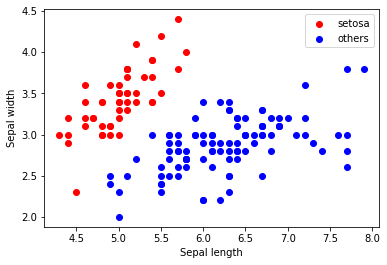

In [26]:
plt.scatter(features[:,0][target==0],features[:,1][target==0],color='r',label='setosa')
plt.scatter(features[:,0][target==1],features[:,1][target==1],color='b',label='others')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

In [27]:
x = np.ones((150,3))
x = features
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

## 3.2.2 Classification using perceptron
Batch learning is used in this method.

In [28]:
j = 0
iterations = 50
costs = []
w = np.random.rand(1,x.shape[1])
while j < iterations:
    predict = x @ w.T
    predict[predict>0] = 1
    predict[predict<=0] = 0
    costs.append(np.sum(np.absolute(predict.T-target)))
    j = j + 1
    for i in range(x.shape[0]):
        if target[i] != predict[i]:
            error = (target[i]-predict[i])
            w = w + error*x[i]
            w = w

## 3.2.3 perceptron cost per iteration 
The cost is False positive + False negetive.

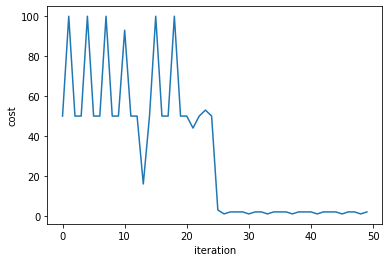

In [29]:
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [30]:
w

array([[ 386.73379437, -688.08436972]])

## 3.2.4 perceptron result
The decision boundary and two classes is shown in the figure below. 

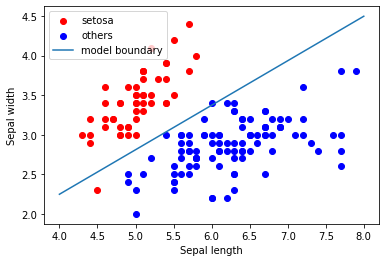

In [31]:
t = np.linspace(4,8,num=10)
y = t*(-w.T[0]/w.T[1])
plt.scatter(features[:,0][target==0],features[:,1][target==0],color='r',label='setosa')
plt.scatter(features[:,0][target==1],features[:,1][target==1],color='b',label='others')
plt.plot(t,y,label='model boundary')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

## 3.3 one vs all
This method is used in multi class classification.In the concept of NN we should do the same proccess we used for setosa and others for other classes too(this means in the example above we will need 2 more neurons for other classes).
Then we can interpret the output of 3 neurons to classify the examples. 